In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import chart_studio.plotly as py
import plotly.graph_objs as go

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
dataset= pd.read_csv("./compitino_dataviz_2021_2022.csv")
dataset.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True


In [113]:
dataset.corr()

,score_preop,score_postop,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,delta_score,sotto_metà,peggiorato,pshysical_score
score_preop,1.000000,0.474966,-4.402127e-02,-4.654340e-02,-1.160736e-02,-2.151878e-02,-5.201716e-03,-0.640267,0.398093,0.541272,-6.114983e-01
score_postop,0.474966,1.000000,-5.144148e-02,1.523470e-02,-2.513441e-02,2.141500e-02,6.515846e-02,0.371872,0.853206,-0.211455,-4.060525e-01
anni_ricovero,-0.044021,-0.051441,1.000000e+00,-6.008525e-02,4.479989e-02,-4.630623e-02,-6.870208e-03,0.001533,-0.065624,0.000915,6.602082e-17
temperatura_media,-0.046543,0.015235,-6.008525e-02,1.000000e+00,-4.440158e-01,7.707805e-01,1.915737e-01,0.062395,0.003891,-0.048033,-1.840144e-16
umidita_media,-0.011607,-0.025134,4.479989e-02,-4.440158e-01,1.000000e+00,-3.176689e-01,-7.329061e-02,-0.009696,-0.017354,0.003756,-4.332531e-17
HI > 27,-0.021519,0.021415,-4.630623e-02,7.707805e-01,-3.176689e-01,1.000000e+00,1.151539e-01,0.041392,0.014770,-0.034409,-1.691715e-16
natural_light,-0.005202,0.065158,-6.870208e-03,1.915737e-01,-7.329061e-02,1.151539e-01,1.000000e+00,0.062364,0.038670,-0.043835,-7.368725e-18
delta_score,-0.640267,0.371872,1.533319e-03,6.239525e-02,-9.695567e-03,4.139246e-02,6.236372e-02,1.000000,0.324827,-0.755546,2.906052e-01
sotto_metà,0.398093,0.853206,-6.562402e-02,3.891291e-03,-1.735441e-02,1.476990e-02,3.867027e-02,0.324827,1.000000,-0.152500,-3.459716e-01
peggiorato,0.541272,-0.211455,9.147496e-04,-4.803275e-02,3.755724e-03,-3.440854e-02,-4.383495e-02,-0.755546,-0.152500,1.000000,-2.916953e-01


In [6]:
dataset.tail()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True
2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True
2108,SF12 PhysicalScore,36.47,43.47,sereno,M,69,23.0,55.0,False,True
2109,SF12 MentalScore,51.70,60.20,sereno,M,69,23.0,55.0,False,True


In [5]:
dataset["delta_score"] = dataset["score_postop"] - dataset["score_preop"] 
dataset["sotto_metà"] = dataset["score_postop"] > (dataset['score_postop'].median())
dataset["peggiorato"] = dataset["delta_score"] < 0
dataset["pshysical_score"] = dataset["nome_modulistica"] == "SF12 PhysicalScore"

In [8]:
dataset['score_postop'].median()

48.885000000000005

In [131]:
dataset.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,delta_score,sotto_metà,peggiorato,pshysical_score
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True,9.8,False,False,True
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True,4.1,True,False,False
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True,10.1,False,False,True
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True,7.6,True,False,False
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True,24.1,True,False,True


In [6]:
dataset['anni_ricovero'].max()

97

In [7]:
dataset['anni_ricovero'].min()

24

Divisione in gruppi di età

In [101]:
import numpy.random as ran
intervals =pd.qcut(dataset["anni_ricovero"], 6)
print(intervals)
dataset["gruppo_eta"] = pd.qcut(dataset["anni_ricovero"], 6)
dataset["gruppo_eta"] = dataset["gruppo_eta"].astype(str)

# dataset["gruppo_eta"] = pd.cut(x=dataset["anni_ricovero"], bins=[20,30,40,50,60,70,80,90,100], labels=["20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"])

0         (69.0, 74.0]
1         (69.0, 74.0]
2         (65.0, 69.0]
3         (65.0, 69.0]
4         (69.0, 74.0]
             ...      
2105      (69.0, 74.0]
2106    (23.999, 58.0]
2107    (23.999, 58.0]
2108      (65.0, 69.0]
2109      (65.0, 69.0]
Name: anni_ricovero, Length: 2110, dtype: category
Categories (6, interval[float64, right]): [(23.999, 58.0] < (58.0, 65.0] < (65.0, 69.0] < (69.0, 74.0] < (74.0, 79.0] < (79.0, 97.0]]


In [102]:
dataset.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,delta_score,sotto_metà,peggiorato,pshysical_score,gruppo_eta
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True,9.8,False,False,True,"(69.0, 74.0]"
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True,4.1,True,False,False,"(69.0, 74.0]"
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True,10.1,False,False,True,"(65.0, 69.0]"
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True,7.6,True,False,False,"(65.0, 69.0]"
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True,24.1,True,False,True,"(69.0, 74.0]"


Visualizzazione population pyramid

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

layout = go.Layout(yaxis=go.layout.YAxis(title='gruppo_eta'),

)


In [ ]:
dataset.shape

In [6]:
dataset= dataset.sort_values("temperatura_media")

In [116]:
import plotly.express as px
fig = px.violin(dataset, y="temperatura_media", x="peggiorato")
fig.show()
newFig =  px.bar(dataset, x="temp", y=["migliorati", "peggiorati"])
newFig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['nome_modulistica', 'score_preop', 'score_postop', 'condizioni_meteo', 'sesso', 'anni_ricovero', 'temperatura_media', 'umidita_media', 'HI > 27', 'natural_light', 'delta_score', 'sotto_metà', 'peggiorato', 'pshysical_score', 'gruppo_eta'] but received: temp

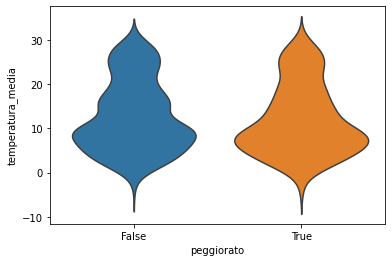

In [124]:
import seaborn as sns
x = sns.violinplot(x="peggiorato", y="temperatura_media", data=dataset, inner=None)

# ax = sns.swarmplot(x="peggiorato", y="temperatura_media", data=dataset,
# size=6
#                   )

Grafico score fisico migliorato o peggiorato in relazione a tempo atmosferico

In [11]:
import plotly.express as px
# dataset["condizioni_meteo"] = pd.factorize(dataset["condizioni_meteo"])[0]
dataframe = pd.DataFrame({"temp":[], "peggiorati": [], "migliorati":[]})
nuovo_dataset = {}
for item in dataset["condizioni_meteo"].unique():
  queryStringPegg = "condizioni_meteo == '"+str(item)+"' and peggiorato == 1 and pshysical_score == 1"
  queryStringMigl = "condizioni_meteo == '"+str(item)+"' and peggiorato == 0 and pshysical_score == 1"

  resPeggiorati = dataset.query(queryStringPegg)
  resMigliorati = dataset.query(queryStringMigl)
  dataframe.loc[len(dataframe.index)] = [item, len(resPeggiorati), len(resMigliorati)]
  nuovo_dataset[str(item)] = len(resPeggiorati)

dataframe = dataframe.sort_values("temp")
#data normalization
dataframe["peggiorati"] = dataframe["peggiorati"]/ dataframe["peggiorati"].sum()
dataframe["migliorati"] = dataframe["migliorati"]/ dataframe["migliorati"].sum()
dataframe.head()
fig = px.line(dataframe, x="temp", y=["peggiorati","migliorati"])
fig.show()
newFig =  px.bar(dataframe, x="temp", y=["migliorati", "peggiorati"])
newFig.show()

Grafico peggiorati in relazione a temperatura media

In [13]:
import plotly.express as px
# dataset["condizioni_meteo"] = pd.factorize(dataset["condizioni_meteo"])[0]
dataframe = pd.DataFrame({"temp":[], "peggiorati": [], "migliorati":[]})
nuovo_dataset = {}
for item in dataset["temperatura_media"].unique():
  queryStringPegg = "temperatura_media == "+str(item)+" and peggiorato == 1 and pshysical_score == 1"
  queryStringMigl = "temperatura_media == "+str(item)+" and peggiorato == 0 and pshysical_score == 1"

  resPeggiorati = dataset.query(queryStringPegg)
  resMigliorati = dataset.query(queryStringMigl)
  dataframe.loc[len(dataframe.index)] = [item, len(resPeggiorati), len(resMigliorati)]
  nuovo_dataset[str(item)] = len(resPeggiorati)

dataframe = dataframe.sort_values("temp")
#data normalization
dataframe["peggiorati"] = dataframe["peggiorati"]/ dataframe["peggiorati"].sum()
dataframe["migliorati"] = dataframe["migliorati"]/ dataframe["migliorati"].sum()
dataframe.head()
fig = px.line(dataframe, x="temp", y=["peggiorati","migliorati"])
fig.show()
newFig =  px.bar(dataframe, x="temp", y=["migliorati", "peggiorati"])
newFig.show()

Grafico in relazione all'umidità

In [14]:
import plotly.express as px
# dataset["condizioni_meteo"] = pd.factorize(dataset["condizioni_meteo"])[0]
dataframe = pd.DataFrame({"temp":[], "peggiorati": [], "migliorati":[]})
nuovo_dataset = {}
for item in dataset["umidita_media"].unique():
  queryStringPegg = "umidita_media == "+str(item)+" and peggiorato == 1 and pshysical_score == 1"
  queryStringMigl = "umidita_media == "+str(item)+" and peggiorato == 0 and pshysical_score == 1"

  resPeggiorati = dataset.query(queryStringPegg)
  resMigliorati = dataset.query(queryStringMigl)
  dataframe.loc[len(dataframe.index)] = [item, len(resPeggiorati), len(resMigliorati)]
  nuovo_dataset[str(item)] = len(resPeggiorati)

dataframe = dataframe.sort_values("temp")
#data normalization
dataframe["peggiorati"] = dataframe["peggiorati"]/ dataframe["peggiorati"].sum()
dataframe["migliorati"] = dataframe["migliorati"]/ dataframe["migliorati"].sum()
dataframe.head()
fig = px.line(dataframe, x="temp", y=["peggiorati","migliorati"])
fig.show()
newFig =  px.bar(dataframe, x="temp", y=["migliorati", "peggiorati"])
newFig.show()

Relazione temperatura e media score

In [15]:
import plotly.express as px
# dataset["condizioni_meteo"] = pd.factorize(dataset["condizioni_meteo"])[0]
dataframe = pd.DataFrame({"temp":[], "media_score_physical": [],"media_score_mental": []})
for item in dataset["umidita_media"].unique():
  queryStringPhysical = "umidita_media == "+str(item)+" and pshysical_score == 1"
  queryStringMental = "umidita_media == "+str(item)+" and pshysical_score == 0"

  resPhysical = dataset.query(queryStringPhysical)
  resMental = dataset.query(queryStringMental)

  dataframe.loc[len(dataframe.index)] = [item, resPhysical["score_postop"].mean(), resMental["score_postop"].mean()]

dataframe = dataframe.sort_values("temp")


fig = px.line(dataframe, x="temp", y=["media_score_physical","media_score_mental"])
fig.show()


Population pyramid

In [111]:
import plotly.graph_objects as gp
from plotly.offline import iplot
import numpy as np
# dataset["condizioni_meteo"] = pd.factorize(dataset["condizioni_meteo"])[0]
dataframe = pd.DataFrame({"gruppo_eta":[], "peggiorati": [], "migliorati":[]})
nuovo_dataset = {}
for item in dataset["gruppo_eta"].unique():
  queryStringPegg = "gruppo_eta == '"+str(item)+"' and peggiorato == 1 and pshysical_score == 1"
  queryStringMigl = "gruppo_eta == '"+str(item)+"' and peggiorato == 0 and pshysical_score == 1"

  resPeggiorati = dataset.query(queryStringPegg)
  resMigliorati = dataset.query(queryStringMigl)
  dataframe.loc[len(dataframe.index)] = [str(item), len(resPeggiorati), len(resMigliorati)]
  nuovo_dataset[str(item)] = len(resPeggiorati)

dataframe = dataframe.sort_values("gruppo_eta")
#data normalization
dataframe["peggiorati"] =- (dataframe["peggiorati"]/ dataframe["peggiorati"].sum())
dataframe["migliorati"] = dataframe["migliorati"]/ dataframe["migliorati"].sum()
dataframe.head()



,gruppo_eta,peggiorati,migliorati
5,"(23.999, 58.0]",-0.150538,0.199079
4,"(58.0, 65.0]",-0.204301,0.154200
1,"(65.0, 69.0]",-0.107527,0.163406
0,"(69.0, 74.0]",-0.182796,0.176064
2,"(74.0, 79.0]",-0.225806,0.162255


In [112]:
fig = gp.Figure()

layout = gp.Layout(yaxis=gp.layout.YAxis(title='Classe di età'),
                   xaxis=gp.layout.XAxis(
                    range=[-0.5,0.5],
                      tickvals=[-0.5, -0.25, 0 , 0.25, 0.5],
                       ticktext=[50,25, 0, 25, 50],
                    title='Percentuale (%)'),
                   barmode='overlay',
                   bargap=0.1,
                   
                   )

data = [gp.Bar(y= dataframe["gruppo_eta"].to_list(), x = dataframe["peggiorati"], 
               orientation='h',
               name='Peggiorati',
               text=(dataframe["peggiorati"]*100).abs().round(2).to_list(),
               hoverinfo='skip',
               
               marker=dict(color='#F4B942'),
                textposition='auto',
               ),
        gp.Bar(y= dataframe["gruppo_eta"].to_list(), x = dataframe["migliorati"],
               orientation='h',
               text=(dataframe["migliorati"]*100).abs().round(2).to_list(),
               name='Migliorati',
                hoverinfo='skip',
               marker=dict(color='#4059AD'),
                textposition='auto',
               )]

iplot(dict(data=data, layout=layout))



In [83]:
import plotly.express as px
fig = px.violin(dataset, x="condizioni_meteo", y="score_postop")
fig.show()

In [105]:
import plotly.graph_objects as gp
from plotly.offline import iplot
import numpy as np
# dataset["condizioni_meteo"] = pd.factorize(dataset["condizioni_meteo"])[0]
dataframe = pd.DataFrame({"gruppo_eta":[], "peggiorati": [], "migliorati":[]})
nuovo_dataset = {}
for item in dataset["gruppo_eta"].unique():
  queryStringPegg = "gruppo_eta == '"+str(item)+"' and peggiorato == 1 and pshysical_score == 1"
  queryStringMigl = "gruppo_eta == '"+str(item)+"' and peggiorato == 0 and pshysical_score == 1"

  resPeggiorati = dataset.query(queryStringPegg)
  resMigliorati = dataset.query(queryStringMigl)
  dataframe.loc[len(dataframe.index)] = [item,- (len(resPeggiorati)/(len(resMigliorati)+len(resPeggiorati))), len(resMigliorati)/(len(resMigliorati)+len(resPeggiorati))]
  nuovo_dataset[str(item)] = len(resPeggiorati)

dataframe = dataframe.sort_values("gruppo_eta")
#data normalization

dataframe.head()

,gruppo_eta,peggiorati,migliorati
5,"(23.999, 58.0]",-0.139303,0.860697
4,"(58.0, 65.0]",-0.220930,0.779070
1,"(65.0, 69.0]",-0.123457,0.876543
0,"(69.0, 74.0]",-0.181818,0.818182
2,"(74.0, 79.0]",-0.229508,0.770492


In [106]:


layout = gp.Layout(yaxis=gp.layout.YAxis(title='Classe di età'),
                   xaxis=gp.layout.XAxis(
                    range=[-1,1],
                      tickvals=[-1, -0.0, 0 , 0.5, 1],
                       ticktext=[100,50, 0, 50, 100],
                    title='Percentuale (%)'),
                   barmode='overlay',
                   bargap=0.1,
                   
                   )

data = [gp.Bar(y= dataframe["gruppo_eta"], x = dataframe["peggiorati"], 
               orientation='h',
               name='Peggiorati',
               text=(dataframe["peggiorati"]*100).abs().round(2).to_list(),
               hoverinfo='skip',
               
               marker=dict(color='#F4B942'),
                textposition='auto',
               ),
        gp.Bar(y= dataframe["gruppo_eta"], x = dataframe["migliorati"],
               orientation='h',
               text=(dataframe["migliorati"]*100).abs().round(2).to_list(),
               name='Migliorati',
                hoverinfo='skip',
               marker=dict(color='#4059AD'),
                textposition='auto',
               )]

iplot(dict(data=data, layout=layout))